In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import scipy.fft as ft
from scipy.signal import lfilter, TransferFunction, residuez, tf2zpk

import scipy.fft as ft
from scipy.signal import lfilter, TransferFunction, residuez, tf2zpk
from scipy import signal

# Definir una función para calcular la Z-transformación de una señal
def calcular_z_transform(senal):
    z_transform = np.fft.fft(senal)
    return z_transform

# Definir una función para aplicar un filtro a una señal y devolver la señal filtrada
def filtrar_senal(senal, fs):
    # Diseñar un filtro (puedes ajustar los parámetros según tus necesidades)
    fc = 10.0  # Frecuencia de corte del filtro en Hz
    b, a = signal.butter(4, fc / (fs / 2), 'low')  # Filtro pasabajos Butterworth de orden 4

    # Aplicar el filtro a la señal
    senal_filtrada = signal.filtfilt(b, a, senal)
    return senal_filtrada

In [36]:
#Cargamos los datos de al data frame
df = pd.read_csv("OpenBCI-RAW-2023-09-29_10-45-58.txt",index_col=[0])
df.head()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,Accel Channel 1,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
Sample Index,,,,,,,,,,,,,,,,,,,,,
0.0,3279.291484,-159870.315775,-10578.901837,-15220.979180,-25420.258989,1108.065380,-16454.504902,-12379.670129,0.036,0.474,...,14.0,208.0,3.0,96.0,0.0,0.0,0.0,1.696002e+09,0.0,2023-09-29 10:45:58.725
1.0,3767.520638,-158980.381069,-9842.277746,-15829.371313,-25566.215881,-407.226432,-16762.534292,-13527.789834,0.036,0.474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696002e+09,0.0,2023-09-29 10:45:58.726
2.0,3970.742699,-160871.808037,-10849.357945,-17434.673600,-25511.319996,-2823.204139,-18044.362133,-14750.117332,0.036,0.474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696002e+09,0.0,2023-09-29 10:45:58.726
3.0,3689.378940,-161875.177845,-11573.934445,-17139.384704,-25362.792654,-1910.090674,-17976.189312,-13949.746066,0.036,0.474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696002e+09,0.0,2023-09-29 10:45:58.726
4.0,3269.009682,-160285.790001,-10803.022778,-15417.629828,-25405.104507,857.278807,-16646.193462,-12456.917758,0.036,0.474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696002e+09,0.0,2023-09-29 10:45:58.726


In [37]:
print(df.shape)
df.columns

(22807, 24)


Index([' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3',
       ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7',
       ' Accel Channel 0', ' Accel Channel 1', ' Accel Channel 2', ' Other',
       ' Other.1', ' Other.2', ' Other.3', ' Other.4', ' Other.5', ' Other.6',
       ' Analog Channel 0', ' Analog Channel 1', ' Analog Channel 2',
       ' Timestamp', ' Other.7', ' Timestamp (Formatted)'],
      dtype='object')

In [38]:
df.isnull().any()
df.info()
# for col in df.columns:
#   print(col, ":",df[col].nunique()) #Numero de valores unicos en un columna
# print("Cantidad de datos repetidos: ",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22807 entries, 0.0 to 35.0
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    EXG Channel 0          22807 non-null  float64
 1    EXG Channel 1          22807 non-null  float64
 2    EXG Channel 2          22807 non-null  float64
 3    EXG Channel 3          22807 non-null  float64
 4    EXG Channel 4          22807 non-null  float64
 5    EXG Channel 5          22807 non-null  float64
 6    EXG Channel 6          22807 non-null  float64
 7    EXG Channel 7          22807 non-null  float64
 8    Accel Channel 0        22807 non-null  float64
 9    Accel Channel 1        22807 non-null  float64
 10   Accel Channel 2        22807 non-null  float64
 11   Other                  22807 non-null  float64
 12   Other.1                22807 non-null  float64
 13   Other.2                22807 non-null  float64
 14   Other.3                22807 non-n

In [39]:
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, 22807) 
chanel0=df[' EXG Channel 0']
chanel1=df[' EXG Channel 1']
chanel2=df[' EXG Channel 2']
chanel3=df[' EXG Channel 3']
chanel4=df[' EXG Channel 4']
chanel5=df[' EXG Channel 5']
chanel6=df[' EXG Channel 6']
chanel7=df[' EXG Channel 7']

**Filtrado de señales**

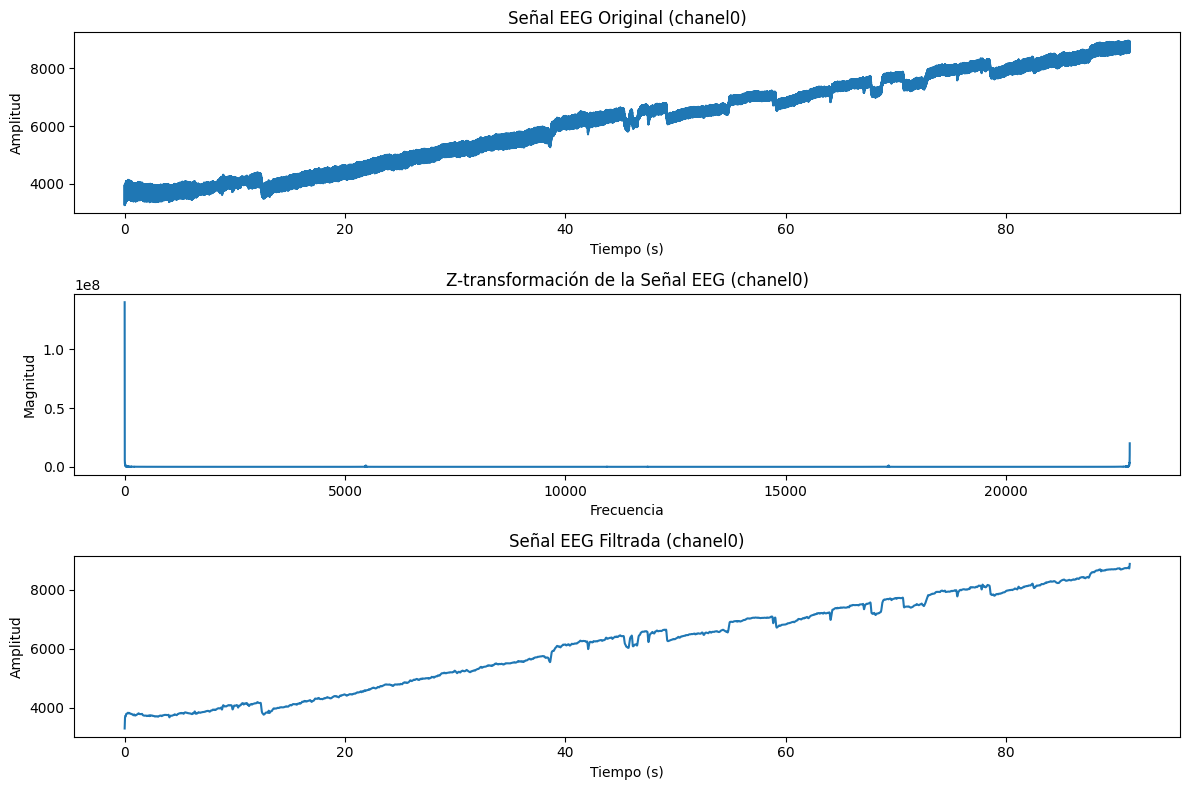

In [40]:
# Frecuencia de muestreo
fs = 250.0  # Hz
muestras = 22807  # Número de muestras del archivo
t = np.arange(0, muestras) / fs #Tiempo
# Filtramos la señal con la Z-transformación
z_transform_chanel0 = calcular_z_transform(chanel0)
z_transform_chanel1 = calcular_z_transform(chanel1)
z_transform_chanel2 = calcular_z_transform(chanel2)
z_transform_chanel3 = calcular_z_transform(chanel3)
z_transform_chanel4 = calcular_z_transform(chanel4)
z_transform_chanel5 = calcular_z_transform(chanel5)
z_transform_chanel6 = calcular_z_transform(chanel6)
z_transform_chanel7 = calcular_z_transform(chanel7)
# Filtramos la señal EEG 
senal_filtrada_chanel0 = filtrar_senal(chanel0, fs)
senal_filtrada_chanel1 = filtrar_senal(chanel1, fs)
senal_filtrada_chanel2 = filtrar_senal(chanel2, fs)
senal_filtrada_chanel3 = filtrar_senal(chanel3, fs)
senal_filtrada_chanel4 = filtrar_senal(chanel4, fs)
senal_filtrada_chanel5 = filtrar_senal(chanel5, fs)
senal_filtrada_chanel6 = filtrar_senal(chanel6, fs)
senal_filtrada_chanel7 = filtrar_senal(chanel7, fs)
# A continuacion solo se muestra el canal 0 filtrada en el siguiente apartado se muestran los demas canales filtrados
# Crear un subplot para mostrar las señales
plt.figure(figsize=(12, 8))
# Señal EEG original sin procesar (chanel0)
plt.subplot(3, 1, 1)
plt.plot(t, chanel0)
plt.title('Señal EEG Original (chanel0)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
# Z-transformación de la señal EEG (chanel0)
plt.subplot(3, 1, 2)
plt.plot(np.abs(z_transform_chanel0))
plt.title('Z-transformación de la Señal EEG (chanel0)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
# Señal EEG filtrada (chanel0)
plt.subplot(3, 1, 3)
plt.plot(t, senal_filtrada_chanel0)
plt.title('Señal EEG Filtrada (chanel0)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()



**Ploteo de Señales**

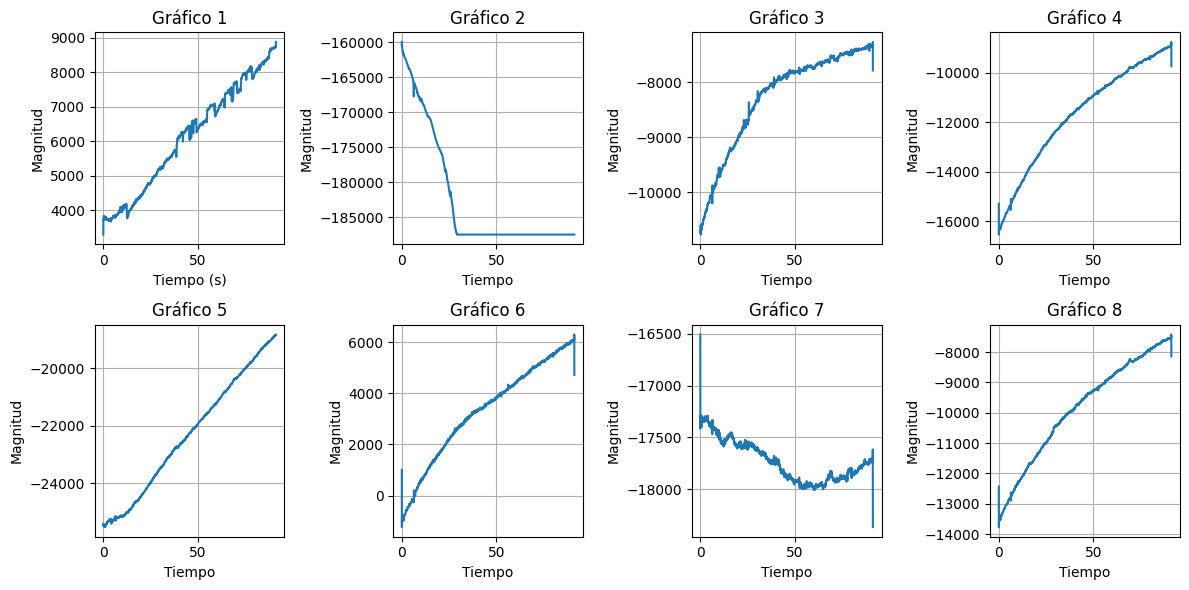

In [43]:
plt.figure(figsize=(12, 6))
# Primer gráfico
plt.subplot(2, 4, 1)
plt.plot(t, senal_filtrada_chanel0)
plt.xlabel('Tiempo (s)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 1')
# # Segundo gráfico
plt.subplot(2, 4, 2)
plt.plot(t, senal_filtrada_chanel1)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 2')
# # Tercer gráfico
plt.subplot(2, 4, 3)
plt.plot(t, senal_filtrada_chanel2)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 3')
# # Cuarto gráfico
plt.subplot(2, 4, 4)
plt.plot(t, senal_filtrada_chanel3)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 4')
# # Quinto gráfico
plt.subplot(2, 4, 5)
plt.plot(t, senal_filtrada_chanel4)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 5')
# # Sexto gráfico
plt.subplot(2, 4, 6)
plt.plot(t, senal_filtrada_chanel5)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 6')
# # Séptimo gráfico
plt.subplot(2, 4, 7)
plt.plot(t, senal_filtrada_chanel6)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 7')
# # Octavo gráfico
plt.subplot(2, 4, 8)
plt.plot(t, senal_filtrada_chanel7)
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.grid(True)
plt.title('Gráfico 8')
# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()